<a href="https://colab.research.google.com/github/mvboas/analise_dados_covid_riodejaneiro/blob/main/notebooks/forecast_covid_rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # Análise dos Dados de Covid-19 - Rio de Janeiro

**Projeto do Módulo 3 do Bootcamp de Data Science 3 da Alura**

Autor: Marcelo Vilas Boas de Castro

e-mail: mvboas.castro@gmail.com

> ## Dados

> ## Objetivo

Essa análise busca fazer uma previsão para os dados de COVID-19 do município do Rio de Janeiro. Para isso, utilizaremos a biblioteca Prophet do Facebook

Documentação do Prophet: https://facebook.github.io/prophet/docs/quick_start.html

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from fbprophet import Prophet

In [2]:
# Definindo parâmetros para os gráficos
mpl.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['font.size'] = 18

In [3]:
# Link para base de dados
url_rio = 'https://raw.githubusercontent.com/mvboas/analise_dados_covid_riodejaneiro/main/dados/covid19-rio.csv'
url_sp = 'https://raw.githubusercontent.com/mvboas/analise_dados_covid_riodejaneiro/main/dados/covid19-sp.csv'
url_df = 'https://raw.githubusercontent.com/mvboas/analise_dados_covid_riodejaneiro/main/dados/covid19-df.csv'
url_sv = 'https://raw.githubusercontent.com/mvboas/analise_dados_covid_riodejaneiro/main/dados/covid19-sv.csv'

In [4]:
# baixando a base de dados
dados_rio = pd.read_csv(url_rio)
dados_sp = pd.read_csv(url_sp)
dados_df = pd.read_csv(url_df)
dados_sv = pd.read_csv(url_sv)

In [5]:
# Transformando a coluna date em tipo datetime 
dados_rio['date'] = pd.to_datetime(dados_rio['date'], format = '%Y-%m-%d')
dados_sp['date'] = pd.to_datetime(dados_sp['date'], format = '%Y-%m-%d')
dados_df['date'] = pd.to_datetime(dados_df['date'], format = '%Y-%m-%d')
dados_sv['date'] = pd.to_datetime(dados_sv['date'], format = '%Y-%m-%d')

In [6]:
# Criando coluna de mortes por 100 mil habitantes
dados_rio['last_available_deaths_100k'] = (dados_rio['last_available_deaths']/dados_rio['estimated_population'])*100000
dados_sp['last_available_deaths_100k'] = (dados_sp['last_available_deaths']/dados_sp['estimated_population'])*100000
dados_df['last_available_deaths_100k'] = (dados_df['last_available_deaths']/dados_df['estimated_population'])*100000
dados_sv['last_available_deaths_100k'] = (dados_sv['last_available_deaths']/dados_sv['estimated_population'])*100000

In [7]:
# Verificando os tipos das variáveis 
dados_rio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   epidemiological_week                           535 non-null    int64         
 1   date                                           535 non-null    datetime64[ns]
 2   order_for_place                                535 non-null    int64         
 3   state                                          535 non-null    object        
 4   city                                           535 non-null    object        
 5   city_ibge_code                                 535 non-null    int64         
 6   place_type                                     535 non-null    object        
 7   last_available_confirmed                       535 non-null    int64         
 8   last_available_confirmed_per_100k_inhabitants  535 non-null 

In [8]:
dados_rio.head()

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated,last_available_deaths_100k
0,202139,2021-10-02,576,RJ,Rio de Janeiro,3304557,city,484433,7179.10909,22964,34102,971,0.0704,6747815,True,False,505.378408
1,202137,2021-09-16,560,RJ,Rio de Janeiro,3304557,city,461469,6838.79152,225,33131,86,0.0718,6747815,False,False,490.988564
2,202137,2021-09-15,559,RJ,Rio de Janeiro,3304557,city,461244,6835.45711,8924,33045,881,0.0716,6747815,False,False,489.714078
3,202135,2021-09-02,546,RJ,Rio de Janeiro,3304557,city,452320,6703.20689,1944,32164,73,0.0711,6747815,False,False,476.658000
4,202135,2021-09-01,545,RJ,Rio de Janeiro,3304557,city,450376,6674.39756,1874,32091,91,0.0713,6747815,False,False,475.576168


> ## Análise Comparativa 

Nesta secção será feita a comparação gráfica da situação epidemológica. O objetivo é entender a gravidade relativa da epidemia no Rio de Janeiro em comparação com outras cidades. As cidades escolhidas para comparação foram São Paulo, Brasília e Salvador - escolhidas por critério de população, junto com o Rio de Janeiro, essas são as quatro cidades mais populosas do Brasil.

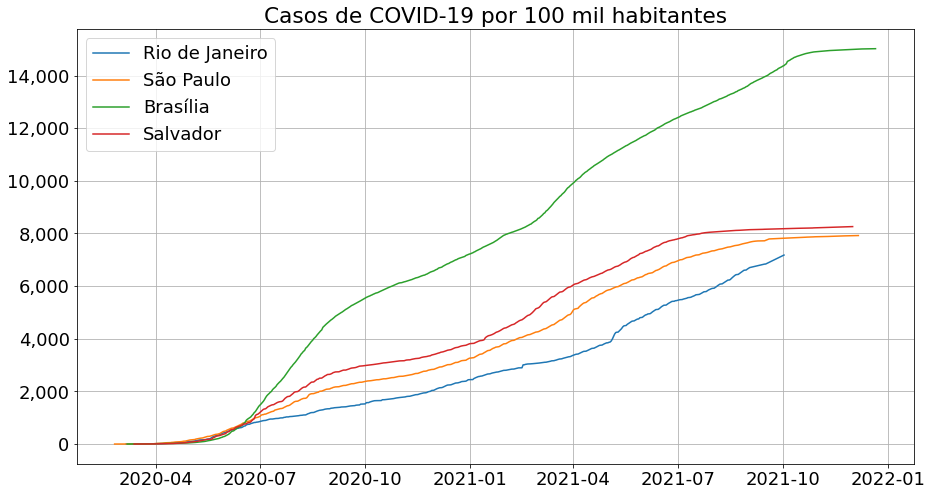

In [9]:
ax = sns.lineplot(x = 'date', y = 'last_available_confirmed_per_100k_inhabitants', data = dados_rio)
sns.lineplot(x = 'date', y = 'last_available_confirmed_per_100k_inhabitants', data = dados_sp)
sns.lineplot(x = 'date', y = 'last_available_confirmed_per_100k_inhabitants', data = dados_df)
sns.lineplot(x = 'date', y = 'last_available_confirmed_per_100k_inhabitants', data = dados_sv)
plt.legend(['Rio de Janeiro', 'São Paulo', 'Brasília', 'Salvador'])
plt.title('Casos de COVID-19 por 100 mil habitantes')
plt.ylabel('')
plt.xlabel('')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid()

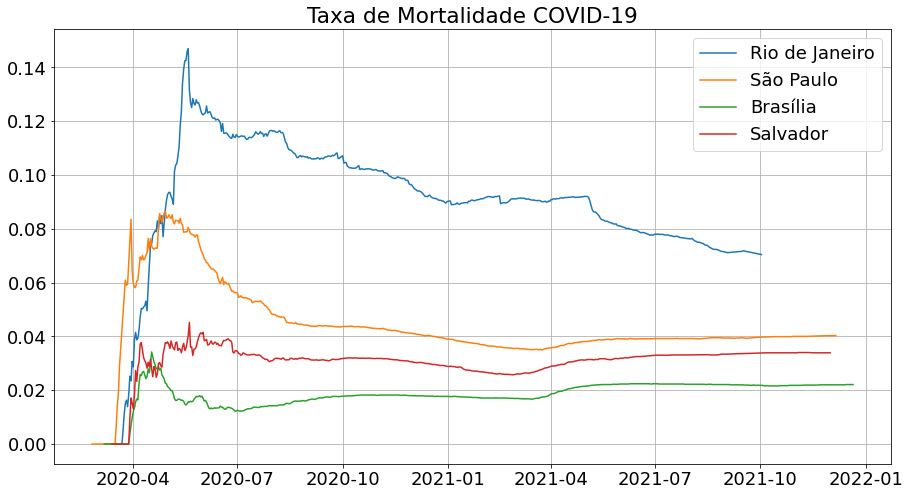

In [10]:
ax = sns.lineplot(x = 'date', y = 'last_available_death_rate', data = dados_rio)
sns.lineplot(x = 'date', y = 'last_available_death_rate', data = dados_sp)
sns.lineplot(x = 'date', y = 'last_available_death_rate', data = dados_df)
sns.lineplot(x = 'date', y = 'last_available_death_rate', data = dados_sv)
plt.legend(['Rio de Janeiro', 'São Paulo', 'Brasília', 'Salvador'])
plt.title('Taxa de Mortalidade COVID-19')
plt.ylabel('')
plt.xlabel('')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.grid()

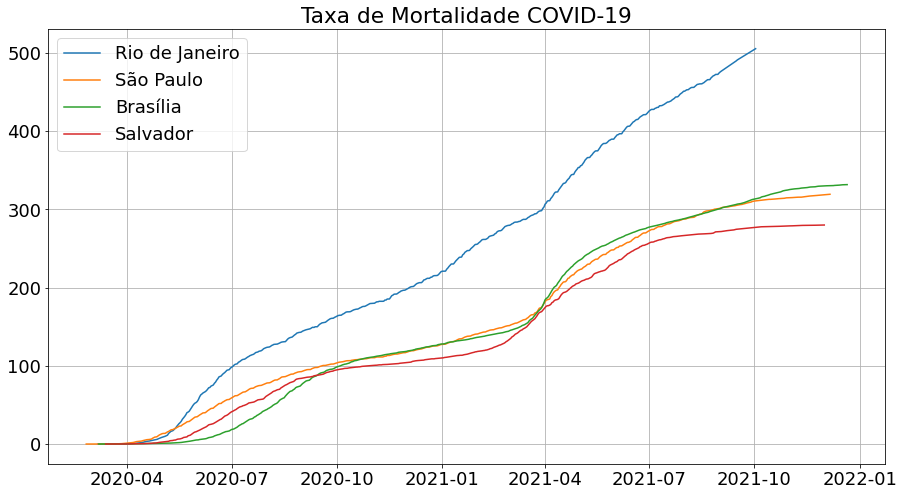

In [11]:
ax = sns.lineplot(x = 'date', y = 'last_available_deaths_100k', data = dados_rio)
sns.lineplot(x = 'date', y = 'last_available_deaths_100k', data = dados_sp)
sns.lineplot(x = 'date', y = 'last_available_deaths_100k', data = dados_df)
sns.lineplot(x = 'date', y = 'last_available_deaths_100k', data = dados_sv)
plt.legend(['Rio de Janeiro', 'São Paulo', 'Brasília', 'Salvador'])
plt.title('Taxa de Mortalidade COVID-19')
plt.ylabel('')
plt.xlabel('')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid()

> ### Conclusões

Ao analisar os gráficos acima, é possível concluir que a epidemia no Rio de Janeiro foi mais grave do que em outras cidades populosas do Brasil. Isso fica claro quando constata-se que apesar de ter tido menos casos por 100 mil habitantes que todas as outras cidades, a taxa de mortalidade do Rio de Janeiro foi superior as outras, o que ocasionou em valores elevados níveis de mortes por 100 mil habitantes em comparação com as outras três cidades.

Diante disso, podemos levantar alguma hipóteses.

* Rio de Janeiro possui a mortalidade próxima aos outros estados, mas há grande nível de subnotificação de casos;
* De fato, a mortalidade no Rio de Janeiro é mais elevada:
  * Acesso a saúde mais díficil do que em outros estados;
  * Qualidade de saúde mais precária que os outros estados.


> ## Análise dos Dados do Município do Rio de Janeiro

Esta secção faz uma análise dos dados para o município do Rio de Janeiro. Nesta secção seguiremos o seguinte caminho:

* Checamos a hipótese de que o crescimento do número de casos é um crescimento exponencial
* Fazemos a diferenciação dos dados de novos casos e mortes
* Calculamos a média móvel de novos casos e mortes para diferentes janelas
* Correlação de novos óbitos e novos casos para diferentes janelas
* Verifica a possibilidade de sazonalidade semanal e mensal
* Fazemos um gráfico de autocorrelação para novos casos

> ### Hipótese de Crescimento Exponencial

É comum assumir que a proliferação de uma doença respiratória segue um crescimento exponencial caso não controlada de alguma forma, então testaremos para ver se o contágio segui dessa forma.

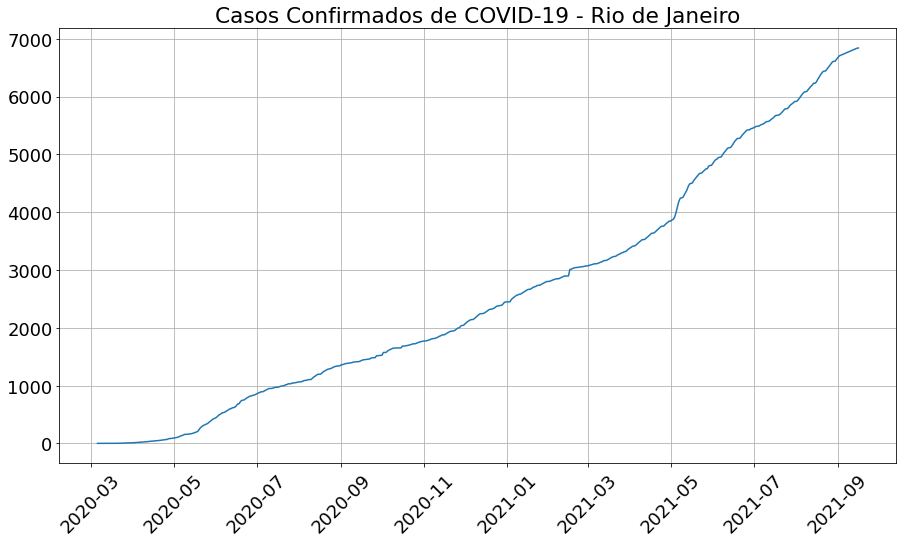

In [12]:
ax = sns.lineplot( x = 'date', y = 'last_available_confirmed_per_100k_inhabitants', data = dados_rio.query('new_confirmed < 10000'))
plt.xticks(rotation = 45)
plt.title('Casos Confirmados de COVID-19 - Rio de Janeiro')
plt.xlabel('')
plt.ylabel('')
plt.grid()

Ao ver o gráfico acima, parece que o crescimento se assemelha mais de um crescimento linear do que exponencial.Para ter certeza, utilizaremos a escala logaritimica para ter certeza

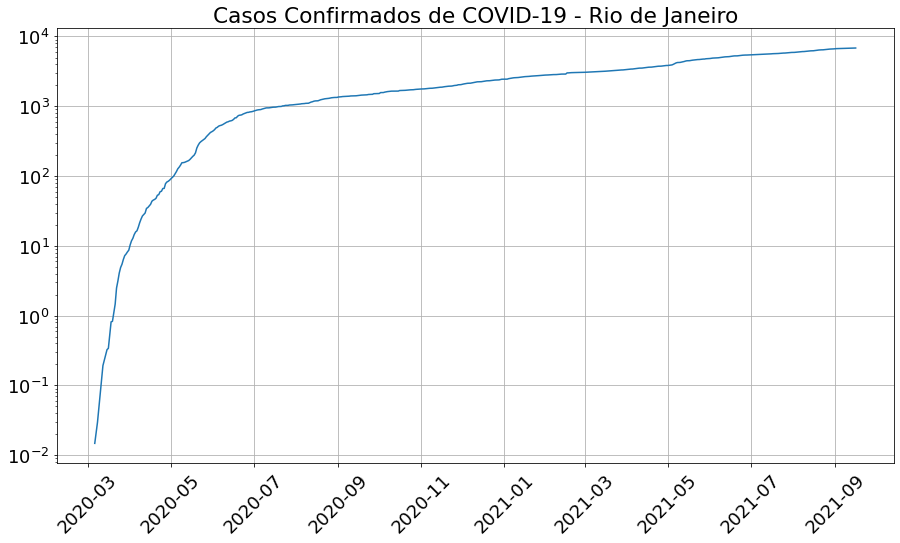

In [13]:
ax = sns.lineplot( x = 'date', y = 'last_available_confirmed_per_100k_inhabitants', data = dados_rio.query('new_confirmed < 10000'))
plt.xticks(rotation = 45)
plt.yscale('log')
plt.title('Casos Confirmados de COVID-19 - Rio de Janeiro')
plt.xlabel('')
plt.ylabel('')
plt.grid()

> #### Conclusões

Caso o crescimento fosse exponencial, seria esperado algo similar a uma reta. Apesar de que alguns pontos podem ser aproximados de uma reta, o crescimento em si não se deu exponencialmente com uma taxa constante

> ### Diferenciação dos Novos Casos e Mortes

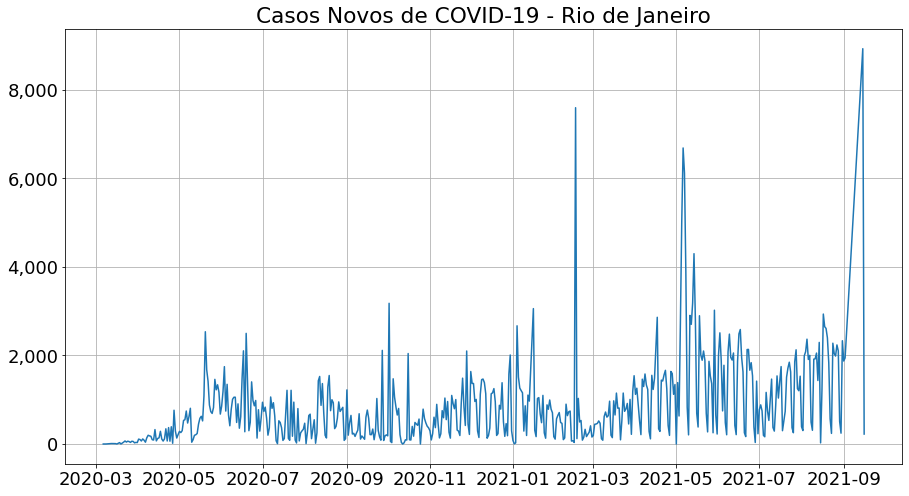

In [14]:
# Plotando os casos novos
ax = sns.lineplot(x = 'date', y = 'new_confirmed', data = dados_rio.query('new_confirmed < 10000'))
plt.grid()
plt.title('Casos Novos de COVID-19 - Rio de Janeiro')
plt.xlabel('')
plt.ylabel('')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))


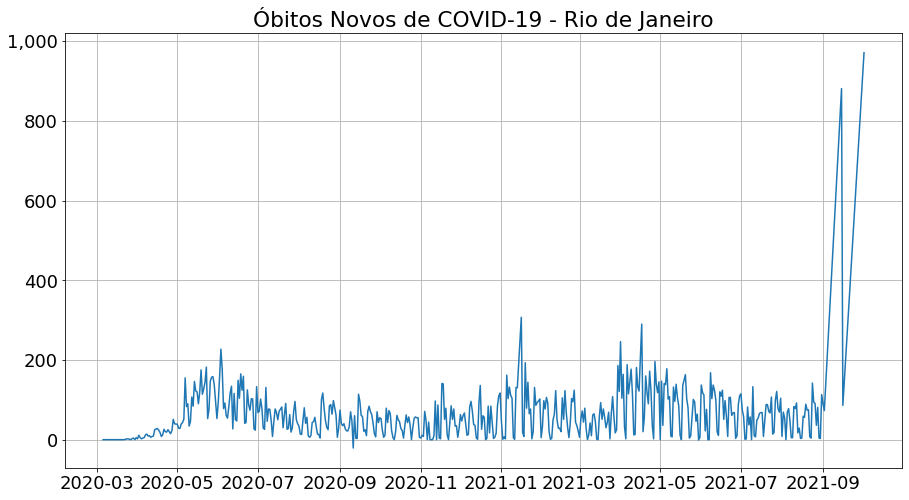

In [15]:
ax = sns.lineplot(x = 'date', y = 'new_deaths', data = dados_rio)
plt.grid()
plt.title('Óbitos Novos de COVID-19 - Rio de Janeiro')
plt.xlabel('')
plt.ylabel('')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

Não é possível extrair muita informação visual dos gráficos acima. Portanto, iremos usar a diferenciação para melhor entender o que está acontecendo

In [16]:
# criando colunas diferenciadas

dados_rio['casos_diferenciados'] = dados_rio['new_confirmed'].diff()
dados_rio['obitos_diferenciados'] = dados_rio['new_deaths'].diff()

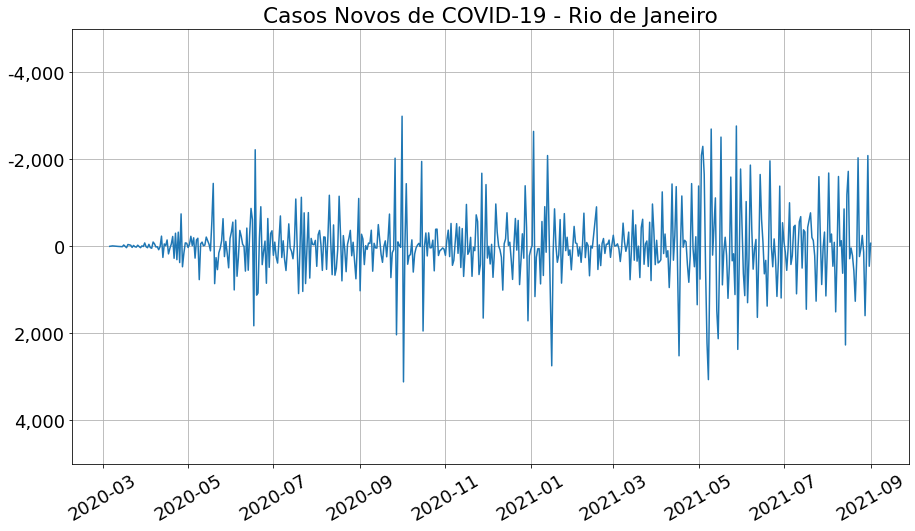

In [17]:
# Plotando Novos casos diferenciados
ax = sns.lineplot(x = 'date', y = 'casos_diferenciados', data = dados_rio.query('(casos_diferenciados < 5000) & (casos_diferenciados > - 5000)'))
plt.grid()
plt.title('Casos Novos de COVID-19 - Rio de Janeiro')
plt.ylim(5000,-5000)
plt.xlabel('')
plt.xticks(rotation = 30)
plt.ylabel('')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

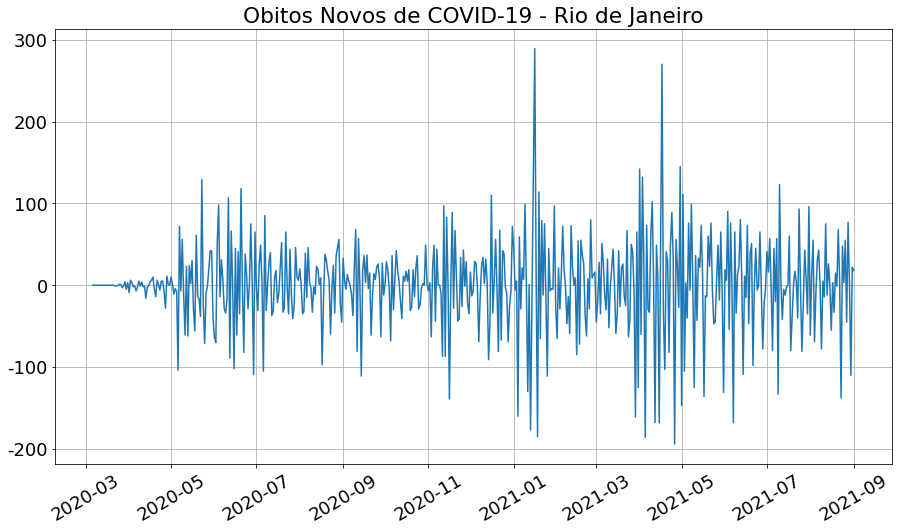

In [18]:
# Plotando obitos novos diferenciados
ax = sns.lineplot(x = 'date', y = 'obitos_diferenciados', data = dados_rio.query('(obitos_diferenciados < 500) & (obitos_diferenciados > - 500)'))
plt.grid()
plt.title('Obitos Novos de COVID-19 - Rio de Janeiro')
plt.xlabel('')
plt.xticks(rotation = 30)
plt.ylabel('')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

> #### Conclusões

Com esse dois últimos gráficos, podemos ter uma melhor noção das tendências. Quando o gráfico fica com picos mais dispersos, temos um aumento dos números de novos casos e quando fica mais "estreiro", temos uma redução das quantidades de novos casos. 

Afim de entender melhor as tendências, utilizaremos a média móvel na próxima secção.

> ### Média Móvel dos Novos Casos e Óbitos

In [26]:
# Criando as colunas de media movel para janela de 7 dias
dados_rio['media_movel_7_casos'] = dados_rio['new_confirmed'].rolling(window = 7, center = False). mean()
dados_rio['media_movel_7_obitos'] = dados_rio['new_deaths'].rolling(window = 7, center = False).mean()

In [34]:
# Criando as colunas de media movel para janela de 14 dias
dados_rio['media_movel_14_casos'] = dados_rio['new_confirmed'].rolling(window = 14, center = False). mean()
dados_rio['media_movel_14_obitos'] = dados_rio['new_deaths'].rolling(window = 14, center = False).mean()

In [40]:
# Criando as colunas de media movel para janela de 14 dias
dados_rio['media_movel_30_casos'] = dados_rio['new_confirmed'].rolling(window = 30, center = False). mean()
dados_rio['media_movel_30_obitos'] = dados_rio['new_deaths'].rolling(window = 30, center = False).mean()

> #### Média Móvel de 7 dias

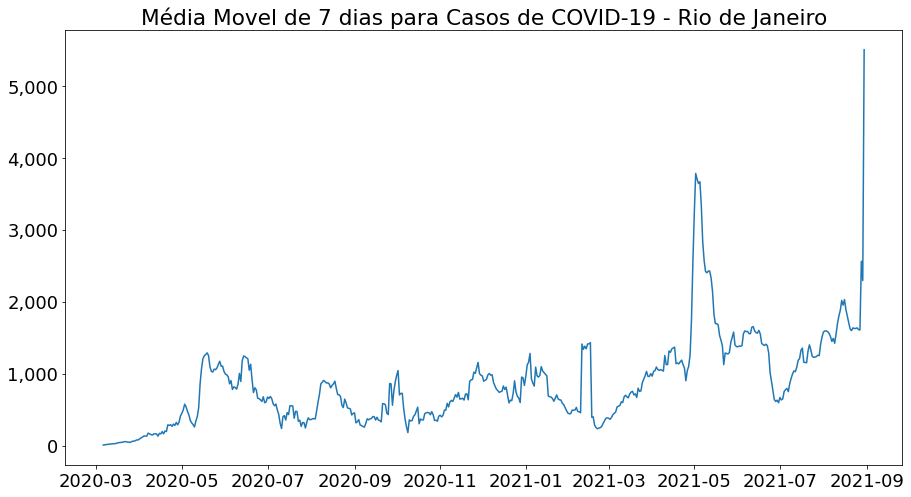

In [31]:
ax = sns.lineplot(x = 'date', y = 'media_movel_7_casos', data = dados_rio)
plt.title('Média Movel de 7 dias para Casos de COVID-19 - Rio de Janeiro')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

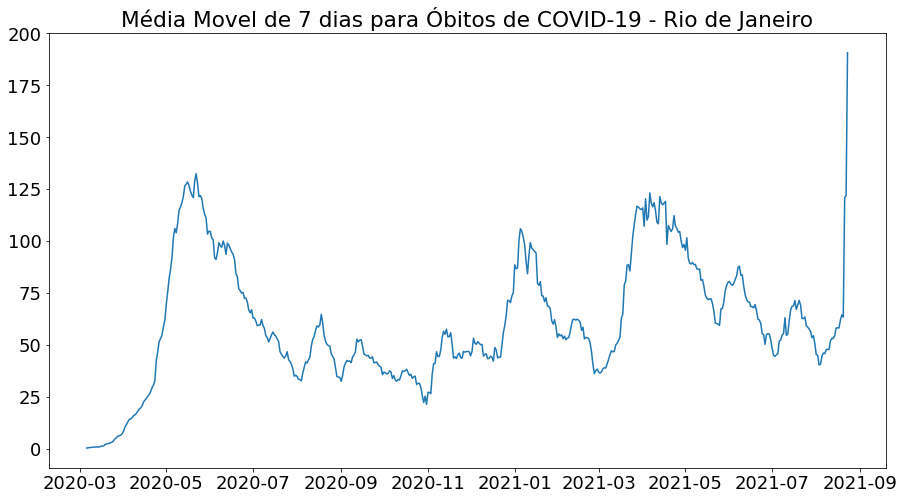

In [32]:
ax = sns.lineplot(x = 'date', y = 'media_movel_7_obitos', data = dados_rio)
plt.title('Média Movel de 7 dias para Óbitos de COVID-19 - Rio de Janeiro')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

> #### Média Móvel de 14 dias

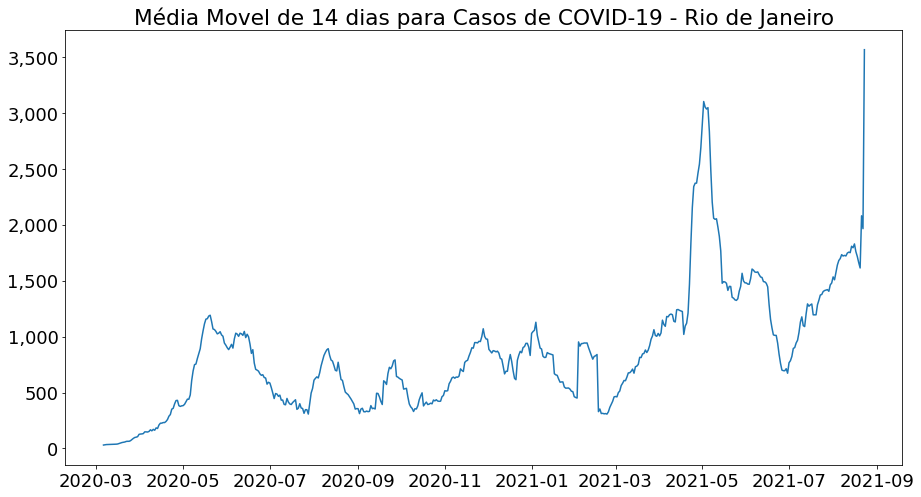

In [30]:
ax = sns.lineplot(x = 'date', y = 'media_movel_14_casos', data = dados_rio)
plt.title('Média Movel de 14 dias para Casos de COVID-19 - Rio de Janeiro')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

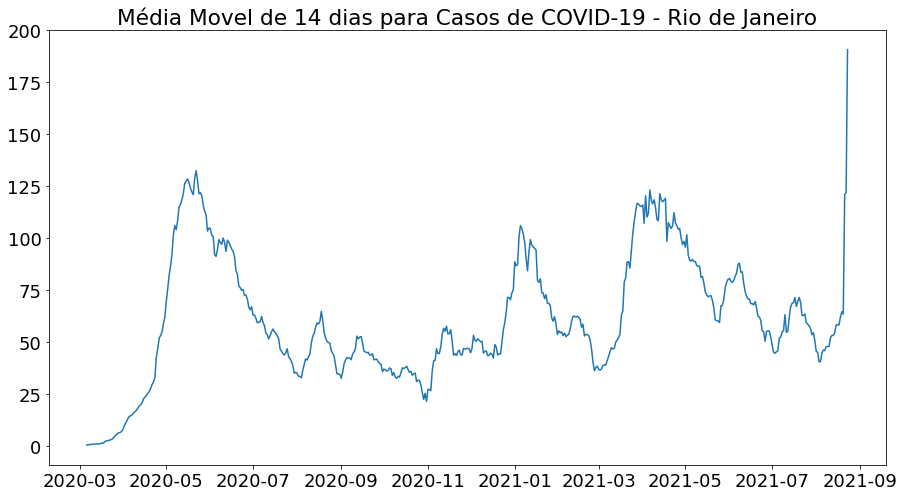

In [35]:
ax = sns.lineplot(x = 'date', y = 'media_movel_14_obitos', data = dados_rio)
plt.title('Média Movel de 14 dias para Casos de COVID-19 - Rio de Janeiro')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

> #### Comparação

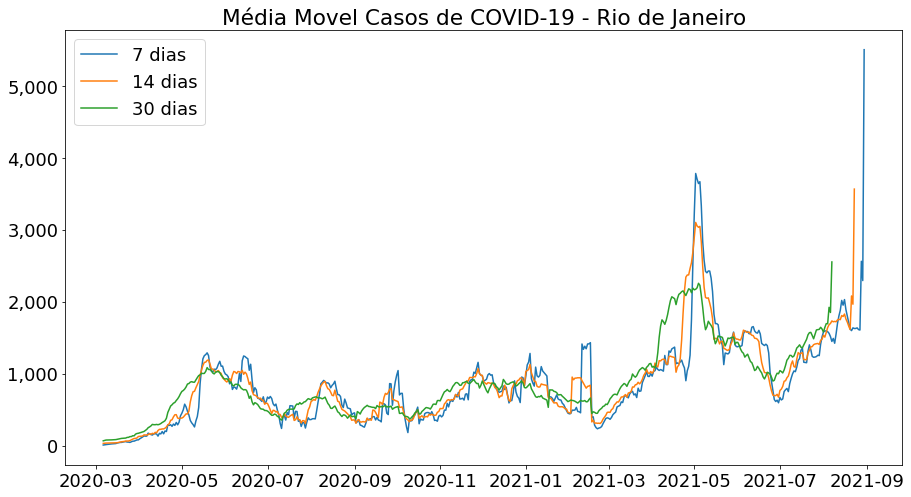

In [42]:
ax= sns.lineplot(x = 'date', y = 'media_movel_7_casos', data = dados_rio)
ax1 = sns.lineplot(x = 'date', y = 'media_movel_14_casos', data = dados_rio)
ax2 = sns.lineplot(x = 'date', y = 'media_movel_30_casos', data = dados_rio)
plt.legend(['7 dias', '14 dias', '30 dias'])
plt.title('Média Movel Casos de COVID-19 - Rio de Janeiro')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

> #### Conclusões

Não há grande diferenças de tendência para as janelas de 7, 14 e 30 dias. 

> ### Correlação entre casos novos e obitos novos

Existe uma correlação entre casos e obitos. É esperado que um valor maior de novos casos hoje, se reflita em um maior número de novos óbitos depois de algum tempo

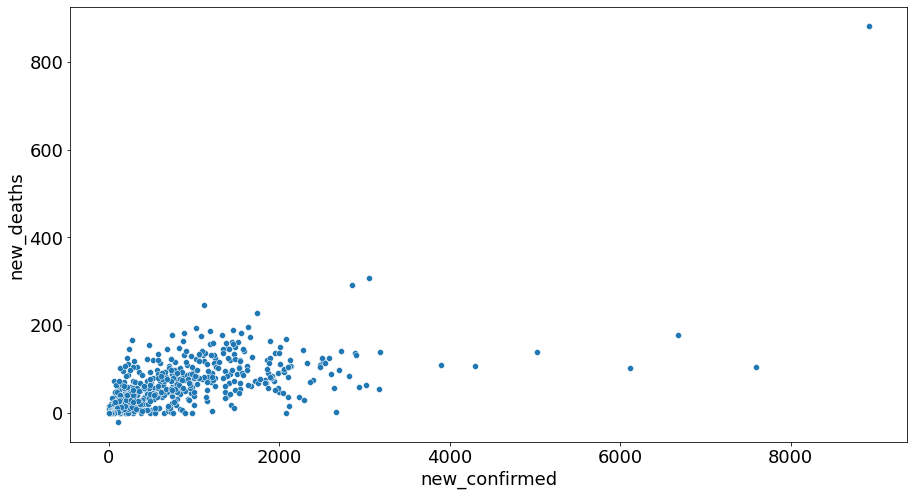

In [44]:
ax = sns.scatterplot(x = 'new_confirmed', y = 'new_deaths', data = dados_rio.query('new_confirmed < 10000'))